# ***Heart Attack Prediction***
1.   Predicting if a patient would have heart attack
2.   DataSet Link: https://www.kaggle.com/ronitf/heart-disease-uci




# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt

# **Loading Data**
1.   0 indicates Yes
2.   1 indicates No



In [ ]:
cell_df=pd.read_csv('/content/heart.csv')
cell_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **Displaying Count of the data**

In [ ]:
cell_df.count()
cell_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# **Visualization of Data**

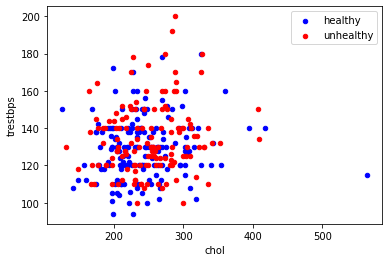

In [ ]:
healthy_df=cell_df[cell_df['target']==1]
unhealthy_df=cell_df[cell_df['target']==0]

axes=healthy_df.plot(kind='scatter',x='chol',y='trestbps',color='blue',label='healthy')
unhealthy_df.plot(kind='scatter',x='chol',y='trestbps',color='red',label='unhealthy',ax=axes)

# **Selection of Columns**

In [ ]:
cell_df.columns
features=cell_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]                

X=np.asarray(features)
y=np.asarray(cell_df['target'])        

# **Splitting the data**

In [ ]:
Train_X,Test_X,Train_y,Test_y=train_test_split(X,y,test_size=0.2,random_state=3)

print('\nTrain_X = ',Train_X.shape)
print('\nTrain_y = ',Train_y.shape)
print('\nTest_X = ',Test_X.shape)
print('\nTest_y = ',Test_y.shape)
print(Train_X[0:5])


Train_X =  (242, 13)

Train_y =  (242,)

Test_X =  (61, 13)

Test_y =  (61,)
[[5.60e+01 0.00e+00 1.00e+00 1.40e+02 2.94e+02 0.00e+00 0.00e+00 1.53e+02
  0.00e+00 1.30e+00 1.00e+00 0.00e+00 2.00e+00]
 [4.70e+01 1.00e+00 0.00e+00 1.10e+02 2.75e+02 0.00e+00 0.00e+00 1.18e+02
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 2.00e+00]
 [5.90e+01 1.00e+00 3.00e+00 1.60e+02 2.73e+02 0.00e+00 0.00e+00 1.25e+02
  0.00e+00 0.00e+00 2.00e+00 0.00e+00 2.00e+00]
 [4.30e+01 0.00e+00 2.00e+00 1.22e+02 2.13e+02 0.00e+00 1.00e+00 1.65e+02
  0.00e+00 2.00e-01 1.00e+00 0.00e+00 2.00e+00]
 [5.70e+01 1.00e+00 0.00e+00 1.65e+02 2.89e+02 1.00e+00 0.00e+00 1.24e+02
  0.00e+00 1.00e+00 1.00e+00 3.00e+00 3.00e+00]]


# **Model Preparation and Results**

In [ ]:
classifier=svm.SVC(C=2.0,kernel='linear',gamma='auto')
classifier.fit(Train_X,Train_y)
pred=classifier.predict(Test_X)
print('***Classification Report***:\n',classification_report(Test_y,pred))
print('***SVM Accuracy Score***:',accuracy_score(Test_y,pred)*100,'%')

***Classification Report***:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.90      0.95      0.93        40

    accuracy                           0.90        61
   macro avg       0.90      0.88      0.89        61
weighted avg       0.90      0.90      0.90        61

***SVM Accuracy Score***: 90.1639344262295 %


# **Predict heart attack (User Input)**

In [ ]:
age=input('\nEnter age in years:')
sex=input('\nEnter sex[0 or 1] 0-female 1-male:')
cp=input('\nEnter Chest pain type [0 or 1 or 2 or 3]:')
trestbps=input('\nEnter resting blood pressure (mmHg):')
chol=input('\nEnter Cholestoral (mg/dl):')
fbs=input('\nEnter fasting blood sugar >120 mg/dl [1-true 0-false]:')
restecg=input('\nEnter resting electrocardiographic results [0 or 1 or 2]:')
thalach=input('\nEnter maximum heart rate achieved:')
exang=input('\nEnter exercise induced agina [1-yes 0-no]:')
oldpeak=input('\nST depression induced by exercise relative to rest [0 to 6.2]:')
slope=input('\nEnter the slope of the peak exercise ST segment [0 or 1 or 2]:')
ca=input('\nEnter number of major vessels colored by flourosopy[0 or 1 or 2 or 3 or 4]:')
thal=input('\nEnter thal [3-normal 6-fixed defect 7-reversible defect]:')
dataList=np.array([age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal])
result=classifier.predict(dataList.reshape(1,-1))
if result[0] == 1:
  print('\nResult --> Congratulations, there are negligible chances of heart attack!')
else:
  print('\nResult --> Kindly Consult your doctor, as your health seems unwell.')



Enter age in years:40

Enter sex[0 or 1] 0-female 1-male:1

Enter Chest pain type [0 or 1 or 2 or 3]:0

Enter resting blood pressure (mmHg):110

Enter Cholestoral (mg/dl):167

Enter fasting blood sugar >120 mg/dl [1-true 0-false]:0

Enter resting electrocardiographic results [0 or 1 or 2]:0

Enter maximum heart rate achieved:114

Enter exercise induced agina [1-yes 0-no]:1

ST depression induced by exercise relative to rest [0 to 6.2]:2

Enter the slope of the peak exercise ST segment [0 or 1 or 2]:1

Enter number of major vessels colored by flourosopy[0 or 1 or 2 or 3 or 4]:0

Enter thal [3-normal 6-fixed defect 7-reversible defect]:3

Result --> Kindly Consult your doctor, as your health seems unwell.
